/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:57: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipyke

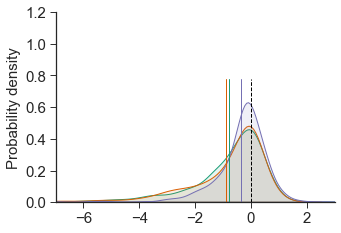

In [27]:
import numpy as np
import cartopy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import sys
import pandas as pd
import matplotlib as mpl
from netCDF4 import Dataset
from matplotlib import cm
from mpl_toolkits.basemap import Basemap, cm
import math
import shapefile as shp
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from matplotlib import rc, rcParams
import os
plt.style.use('seaborn-ticks')

title_size  = 17
marker_size = 7
stepsize    = 0.01
label_size  = 15
border_size = 1.0
tick_size   = 15
legend_size = 10
line_width  = 0.5
rotation    = 45
text_size   = 10
unit_size   = 11
box_width   = 0.22
box_linewidth=1
max_min_markersize=3
markersize=50
alpha=1.0

data_dir="../data/"

#### plot
figure_width=10
figure_length=6
figure_rows = 1
figure_cols = 1
subplot_ratio=1

def roller(data):
    datas = np.zeros((192,288))
    datas[:,:144] = data[:,144:]
    datas[:,144:]= data[:,:144]
    datas[datas>1e35]=np.nan
    return datas

def read_data(fname,var):
    pt=Dataset(fname, 'r')
    data=pt.variables[var]
    data=np.array(data)
    return data

def mask_deforestation(forestdiff,bioenergydiff,cropdiff,data):
    bioenergy_diff_threshold=5
    forest_diff_threshold = (-1)*bioenergy_diff_threshold
    
    indices = np.where(forestdiff == np.nanmin(forestdiff))
    indices2 = np.where(forestdiff == np.nanmax(forestdiff))
        
    data=np.where(forestdiff<forest_diff_threshold, data,np.nan)    
    data=np.where(bioenergydiff>bioenergy_diff_threshold, data,np.nan)
    
    if (excludeFoodcropExpansion):
        data=np.where(cropdiff>25,np.nan, data)
    
    return data

def fillmissing_lucc(data):
    data=np.where(data>=1.00001, np.nan,data)
    data=np.where(data<0.0, np.nan,data)
    return data

def fill_missingVal(data,missVal):
    data=np.where(data>=missVal, np.nan,data)
    return data

def subplot_pair(paras1,paras2,paras3,paras4):
    figure_width=5
    figure_length=3.5
    figure_rows = 1
    figure_cols = 1
    fig, axs = plt.subplots(figure_rows, figure_cols, figsize=(figure_width,figure_length))
    sns.despine(left=False,bottom=False)
    
    plt.rcParams["axes.labelsize"] = label_size
    plt.rcParams["axes.titlesize"] = label_size
    plt.rcParams["xtick.labelsize"] = label_size
    plt.rcParams["ytick.labelsize"] = label_size
    plt.rcParams["legend.fontsize"]=label_size
    rc('font', style='normal')
    rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \italicmath']
    
    ax=axs
    ylabel = "Probability density"
    alpha=0.1
    orange="#F4AA00"
    green="#2C43FA"
    plot_hist = False
    color1="#1b9e77"
    color2="#d95f02"
    color3="#7570b3"
    
    dcdfTrue = False
    if (dcdfTrue):
        var="dC/df (kg C/m$^2$/%)\n(2100 vs. 2015)"
    else:
        var=r"$\Delta$"+"Soil C (kg C/m$^2$)\n(2100 vs. 2015)"
    sns.distplot(paras1, hist=plot_hist, color=color1,axlabel=var, \
                 kde_kws={"shade": True,"alpha": alpha},ax=ax)
    sns.distplot(paras2, hist=plot_hist, color=color2,axlabel=var, \
                 kde_kws={"shade": True,"alpha": alpha}, ax=ax)
    sns.distplot(paras3, hist=plot_hist, color=color3,axlabel=var, \
                 kde_kws={"shade": True,"alpha": alpha}, ax=ax)
    
    ax.tick_params(axis='both', which='major', labelsize=tick_size,color="k")
    ax.set_xlabel("",fontsize=label_size,fontstyle="normal")
    ax.set_ylabel(ylabel,fontsize=label_size,fontstyle="normal")
    ymax = .65
    ax.axvline(x=0.0,c="k",linewidth=1.0,linestyle="--",ymax = ymax)
    ax.axvline(x=np.nanmean(paras1),c=color1,linewidth=1.0,linestyle="-",ymax = ymax)
    ax.axvline(x=np.nanmean(paras2),c=color2,linewidth=1.0,linestyle="-",ymax = ymax)
    ax.axvline(x=np.nanmean(paras3),c=color3,linewidth=1.0,linestyle="-",ymax = ymax)
    
    from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
    step=10
    ax.set_xlim(-7,3)
    ax.set_ylim(0,1.2)
    if (dcdfTrue):
        ax.set_xlim(-100,100)
    fig.patch.set_facecolor("white")
    fig.patch.set_alpha(0.0)
    
    fig_dir = "../figures/"
    bname = "Fig2e"
    figname=fig_dir+bname+'.pdf'
    os.system("rm -f "+figname)
    plt.savefig(figname,bbox_inches='tight')


def read_one_ensemble(caseid):    
    fname=data_dir +var+"_SSP226Lu-BIOCROP_"+caseid+"_2015_2100.nc"
    data = read_data(fname, "value")
    lastyrindex = -1
    data = data[lastyrindex,:,:]-data[0,:,:]
    data=fill_missingVal(data,1e36)
    data[data==0] = np.nan
    vegc=data /1000. #convert gC/m2 to kgC/m2
    return vegc

def read_frac(crop):
    fname=data_dir+crop+"_frac_2015_SSP226Lu-BIOCROP.nc"
    firstyr_forest = read_data(fname, "biofrac") * 100.
    fname=data_dir+crop+"_frac_2100_SSP226Lu-BIOCROP.nc"
    lastyr_forest = read_data(fname, "biofrac") * 100.
    forestdiff = lastyr_forest-firstyr_forest
    return forestdiff

def sub_function(crop):        
    ensbase=np.empty((ens_size,192,288))
    for caseid,i in zip(["ensemble1","ensemble2","ensemble3"],np.arange(ens_size)):
        ensbase[i,:,:] = read_one_ensemble(caseid)
    vegc = np.nanmean(ensbase,axis=0)
            
    if (crop == "forest"):
        dominant_factor = forest_dominant
    elif (crop =="shrub"):
        dominant_factor = shrub_dominant
    elif (crop =="grass"):
        dominant_factor = grass_dominant
    elif (crop =="crop"):
        dominant_factor = crop_dominant
    
    ### read bioenergy expansion
    crop = "bioenergy"
    fname=data_dir+crop+"_frac_2015_SSP226Lu-BIOCROP.nc"
    firstyr_bioenergy = read_data(fname, "biofrac") * 100.
    fname=data_dir+crop+"_frac_2100_SSP226Lu-BIOCROP.nc"
    lastyr_bioenergy = read_data(fname, "biofrac") * 100.
    
    bioenergydiff = lastyr_bioenergy-firstyr_bioenergy
    
    vegc = mask_deforestation(dominant_factor,bioenergydiff,cropdiff,vegc)
    return vegc

nlat,nlon=192,288
ens_size=3
missVal=1e36
vmin=-1
vmax=1
step=.2

vmax =.1
vmin=(-1)*vmax
step=vmax/5
var = "TOTSOMC"
excludeFoodcropExpansion = True

### read forest fraction
forestdiff = read_frac("forest")
shrubdiff = read_frac("shrub")
grassdiff = read_frac("grass")
cropdiff = read_frac("crop")
biodiff = read_frac("bioenergy")

factors = np.array([forestdiff,shrubdiff,grassdiff,cropdiff])
forest_dominant = np.where(np.argmin(factors,axis=0)==0, forestdiff, np.nan)
shrub_dominant = np.where(np.argmin(factors,axis=0)==1, shrubdiff, np.nan)
grass_dominant = np.where(np.argmin(factors,axis=0)==2, grassdiff, np.nan)
crop_dominant = np.where(np.argmin(factors,axis=0)==3, cropdiff, np.nan)

yearstring="_86years"
forest = sub_function("forest")
forest = forest.reshape(nlat*nlon)

grass = sub_function("grass")
grass = grass.reshape(nlat*nlon)

shrub = sub_function("shrub")
shrub = shrub.reshape(nlat*nlon)

crop = sub_function("crop")
crop = crop.reshape(nlat*nlon)

subplot_pair(forest,shrub,grass,crop)
